# Rally de Datos GTO
## _Semana 2_: Género

In [28]:
# Se importan las librerías para el análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Se define el estilo de las gráficas
sns.set_context('talk')

# Se define la paleta de colores de las gráficas
colors = ["#264653", "#2a9d8f", "#e9C46a", "#F4A261", "#E76F51"]
sns.set_palette(sns.color_palette(colors))

En específico, se estudiarán los __PP__ y los __PED__ relacionados con el __ODS 10__ (_Reducción de la Desigualdad_).

In [2]:
# Se define el url donde se encuentra el archivo (en el repositorio de Github)
url = "https://github.com/GOLF-fisica/Dataket/blob/main/Semana2/pps-a-2021.xlsx?raw=true"

# Se lee el archivo
# Se usa lo del engine porque en deepnote lanzaba error sin esa opción
# Para usar ese engine se necesita instalar previamente (se encuentra en requierements.txt)
df = pd.read_excel(url, sheet_name="pps-aprobado-2021", engine='openpyxl')

In [3]:
# Se calcula el presupuesto aprobado por PP
pp_dinero = df.groupby("id_programa_presupuestario").sum()["aprobado"]

## 1. Alineación de los PP con los ODS

In [4]:
# Se define el url donde se encuentra el archivo (en el repositorio de Github)
url_pp = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana2/alineacion_pp_ods.csv"

# Se lee el archivo
df_pp = pd.read_csv(url_pp, encoding="latin")

In [5]:
# Se filtran los registros que pertenecen al ODS 10: Reducción de la desigualdad
# además, se omiten las columnas que se hacen redundantes (pues refieren al ODS)
df_pp_10 = df_pp[ df_pp["id_ods"]==10 ].drop(["id_ods", "descripcion_ods"], axis=1)

In [6]:
# Los programas presupuestarios que soportan ese ODS
pps_10 = df_pp_10["id_programa_presupuestario"].unique()
pps_10_dinero = pp_dinero[pp_dinero.index.isin(pps_10)].sort_values(ascending=False)

In [7]:
# Los PP que aparecen en df_pp con el ODS 10
pps_10

array(['E010', 'S008', 'E009', 'R009', 'E022', 'E007'], dtype=object)

In [8]:
# Los PP aprobados que coinciden con pps_10
# Note que en este caso no aparece E022,
# esto significa que este PP no fue aprobado
pps_10_dinero

id_programa_presupuestario
E010    1.695605e+08
E009    8.909447e+07
E007    3.337231e+07
S008    1.481824e+07
R009    0.000000e+00
Name: aprobado, dtype: float64

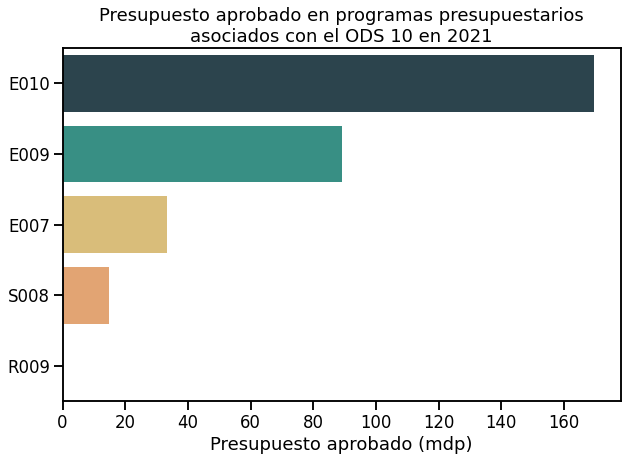

In [9]:
# Gráfica del presupuesto por programa alineado al ODS 10
plt.figure(figsize=(10, 6.5))

sns.barplot(x=pps_10_dinero/1_000_000, y=pps_10_dinero.index)

plt.title("Presupuesto aprobado en programas presupuestarios\nasociados con el ODS 10 en 2021")
plt.ylabel("")
plt.xlabel("Presupuesto aprobado (mdp)")

plt.show()

In [10]:
# Para ver de qué trataba E022, el PP que no fue aprobado
df_pp[df_pp["id_programa_presupuestario"]=="E022"]

,id_eje,descripcion_eje,id_programa_presupuestario,descripcion_programa_presupuestario,id_componente,descripcion_componente,id_siglas,descripcion_siglas,id_ods,descripcion_ods,id_meta,descripcion_meta,id_tema_general,descripcion_tema_general,id_tema_objetivo,descripcion_tema_objetivo,id_meta_rubro_propuesta,descripcion_meta_rubro_propuesta
378,7,Poderes y Autónomos,E022,Confianza en el Instituto Electoral del Estado...,E022.C03,Gestión institucional mejorada.,IEEG,Instituto Electoral del Estado de Guanajuato,16,"Objetivo 16: Promover sociedades, justas, pací...",16.6,16.6 Crear a todos los niveles instituciones e...,3,Desarrollo social,3.1,Sociedades justas,3.1.1,"Paz, justicia e instituciones"
482,7,Poderes y Autónomos,E022,Confianza en el Instituto Electoral del Estado...,E022.C01,Proceso electoral local 2020-2021 celebrado.,IEEG,Instituto Electoral del Estado de Guanajuato,16,"Objetivo 16: Promover sociedades, justas, pací...",16.6,16.6 Crear a todos los niveles instituciones e...,3,Desarrollo social,3.1,Sociedades justas,3.1.1,"Paz, justicia e instituciones"
493,7,Poderes y Autónomos,E022,Confianza en el Instituto Electoral del Estado...,E022.C02,Programas de educación cívica y participación ...,IEEG,Instituto Electoral del Estado de Guanajuato,10,Objetivo 10: Reducir la desigualdad en y entre...,10.2,"10.2 Potenciar y promover la inclusión social,...",3,Desarrollo social,3.6,Desigualdad,3.6.1,Reducción de desigualdades


In [11]:
# Para ver de qué trata R009 que parece haber sido aprobado pero sin dinero
df[df["id_programa_presupuestario"]=="R009"]

,ciclo,periodo,id_eje,descripcion_eje,id_division,descripcion_division,id_centro_gestor,descripcion_centro gestor,id_modalidad,descripcion_modalidad,id_programa_presupuestario,descripcion_programa_presupuestario,id_proceso_proyecto,descripcion__proceso_proyecto,detalle,aprobado
1299,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3117,Optimización del proceso de otorgamiento y pag...,Otorgamiento de los seguros contempladas en l...,0.0
1300,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3118,Optimización del proceso de otorgamiento y pag...,Préstamos otorgados en sus diferentes modalida...,0.0
1301,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3119,"Optimización del proceso de afiliación, vigenc...",Optimización del proceso de vigilancia del cum...,0.0
1302,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3120,Diversificación y optimización de inversiones ...,Administración y comercialización eficiente de...,0.0
1303,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3121,Optimización de inversiones financieras,Análisis y optimización de inversiones en los ...,0.0
1304,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3122,Impulso al rendimiento asociado al otorgamient...,Promoción de otorgamiento de préstamos para la...,0.0
1305,2021,2021-01-01,6,Gobierno humano y eficaz,3031,Instituto de Seguridad Social del Estado de Gu...,3031,Instituto de Seguridad Social del Estado de Gu...,R,Funciones de Gobierno Específicos,R009,Garantizar el otorgamiento y pago de seguros y...,P3123,Optimización de la cadena de farmacias ISSEG,Implementación de estategias comerciales efici...,0.0


In [12]:
# Las dependencias que soportan el ODS
df_pp_10.groupby(["id_siglas", "id_programa_presupuestario"]).size()

id_siglas  id_programa_presupuestario
DIF        E009                          1
           E010                          2
IEEG       E022                          1
INGUDIS    E007                          2
ISSEG      R009                          3
SDSH       E010                          2
SMEI       S008                          2
dtype: int64

In [13]:
# Las dependencias de los presupuestos aprobados que soportan el ODS
# (esto es para verificar la consistencia entre el resultado de esta base de
# datos y la anterior: dd_pp_10)
df[df["id_programa_presupuestario"].isin(pps_10)].groupby(["descripcion_division", "descripcion_centro gestor", "id_programa_presupuestario"]).size()

descripcion_division                                        descripcion_centro gestor                                   id_programa_presupuestario
Instituto Guanajuatense para las Personas con Discapacidad  Instituto Guanajuatense para las Personas con Discapacidad  E007                          4
Instituto de Seguridad Social del Estado de Guanajuato      Instituto de Seguridad Social del Estado de Guanajuato      R009                          7
Secretaría de Desarrollo Social y Humano                    Dirección General de Articulación Regional                  E010                          2
                                                            Dirección General de Centros Impulso Social                 E010                          1
                                                            Dirección General de desarrollo Humano y Comunitario        E010                          6
Secretaría del Migrante y Enlace Internacional              Despacho del C. Secretario       

In [31]:
# Un df que se modificará para tener una linda gráfica
df_dummy = df[df["id_programa_presupuestario"].isin(pps_10)]

# Se cambian los nombres de las dependencias por sus siglas
diccionario = {"Instituto Guanajuatense para las Personas con Discapacidad": "INGUDIS",
               "Instituto de Seguridad Social del Estado de Guanajuato": "ISSEG",
               "Secretaría de Desarrollo Social y Humano": "SDSH",
               "Secretaría del Migrante y Enlace Internacional": "SMEI",
               "Sistema Estatal Para el desarrollo Integral de la Familia": "DIF"}
df_dummy["Siglas de la dependencia"] = df_dummy["descripcion_division"].map(diccionario)

# Se añade un directorio base y se coloca el presupuesto en términos de mdp
df_dummy["ODS 10"] = "Dependencias y Pp's alineadas al ODS 10"
df_dummy["Presupuesto aprobado (mdp)"] = round(df_dummy["aprobado"].copy()/1_000_000, 2)

fig = px.treemap(df_dummy,
                 path=["ODS 10", "Siglas de la dependencia", "id_programa_presupuestario"],
                 values="Presupuesto aprobado (mdp)")

plotly.offline.plot(fig, filename='/work/treemap.html')

fig.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

## 2. Alineación de los PED con los ODS

In [14]:
# Se define el url donde se encuentra el archivo (en el repositorio de Github)
url_ped = "https://github.com/GOLF-fisica/Dataket/raw/main/Semana2/alineacion_ped_ods.csv"

# Se lee el archivo
df_ped = pd.read_csv(url_ped, encoding="latin")

In [15]:
# Se filtran los registros que pertenecen al ODS 10: Reducción de la desigualdad
# además, se omiten las columnas que se hacen redundantes (pues refieren al ODS)
df_ped_10 = df_ped[ df_ped["id_ods"]=="ODS.10" ].drop(["id_ods", "descripcion_ods"], axis=1)

In [16]:
df_ped_10

,id_dimension_ped,descripcion_dimension_ped,id_linea_estrategica_ped,descripcion_linea_estrategica_ped,id_objetivo_ped,descripcion_objetivo_ped,id_estrategia_ped,descripcion_estrategia_ped,id_metas_ods,descripción_metas_ods
57,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.01,Abatir la pobreza en todas sus vertientes y de...,PED.01.01.01.01,Incremento de las opciones de empleo y el ingr...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
58,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.01,Abatir la pobreza en todas sus vertientes y de...,PED.01.01.01.02,Mejora de la alimentación y nutrición de la po...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
59,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.01,Abatir la pobreza en todas sus vertientes y de...,PED.01.01.01.03,Cobertura universal de los servicios básicos.,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
60,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.01,Abatir la pobreza en todas sus vertientes y de...,PED.01.01.01.04,Impulso a la familia como la institución que p...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
61,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.01,Abatir la pobreza en todas sus vertientes y de...,PED.01.01.01.05,Incremento de los niveles de cohesión social d...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
62,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.01,Abatir la pobreza en todas sus vertientes y de...,PED.01.01.01.06,Promoción de la innovación social con la parti...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
63,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.02,"Otorgar servicios de salud oportunos, con alto...",PED.01.01.02.01,Consolidación de un sistema de salud universal...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
64,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.02,"Otorgar servicios de salud oportunos, con alto...",PED.01.01.02.02,Profesionalización de las y los trabajadores d...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
65,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.02,"Otorgar servicios de salud oportunos, con alto...",PED.01.01.02.03,Fortalecimiento de las unidades médicas con eq...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."
66,PED.D01,Humana y Social,PED.01.01,Bienestar Social,PED.01.01.02,"Otorgar servicios de salud oportunos, con alto...",PED.01.01.02.04,Garantía de la cercanía de los servicios de sa...,MM.10.02,"10.2 Potenciar y promover la inclusión social,..."


In [17]:
df_ped.head()

,id_dimension_ped,descripcion_dimension_ped,id_linea_estrategica_ped,descripcion_linea_estrategica_ped,id_objetivo_ped,descripcion_objetivo_ped,id_estrategia_ped,descripcion_estrategia_ped,id_ods,descripcion_ods,id_metas_ods,descripción_metas_ods
0,PED.D04,Administración Pública y Estado de Derecho,PED.04.01,Gobernanza,PED.04.01.02,"Consolidar una gestión pública abierta, transp...",PED.04.01.02.01,"Armonización legislativa y reglamentaria, que ...",ODS.16,"Objetivo 16: Promover sociedades, justas, pací...",MM.16.08,16.8 Ampliar y fortalecer la participación de ...
1,PED.D04,Administración Pública y Estado de Derecho,PED.04.01,Gobernanza,PED.04.01.02,"Consolidar una gestión pública abierta, transp...",PED.04.01.02.02,"Impulso de la coordinación entre el gobierno, ...",ODS.16,"Objetivo 16: Promover sociedades, justas, pací...",MM.16.08,16.8 Ampliar y fortalecer la participación de ...
2,PED.D04,Administración Pública y Estado de Derecho,PED.04.01,Gobernanza,PED.04.01.02,"Consolidar una gestión pública abierta, transp...",PED.04.01.02.03,Fortalecimiento de la participación ciudadana ...,ODS.16,"Objetivo 16: Promover sociedades, justas, pací...",MM.16.08,16.8 Ampliar y fortalecer la participación de ...
3,PED.D04,Administración Pública y Estado de Derecho,PED.04.01,Gobernanza,PED.04.01.02,"Consolidar una gestión pública abierta, transp...",PED.04.01.02.04,Capacitación permanente en temas de transparen...,ODS.16,"Objetivo 16: Promover sociedades, justas, pací...",MM.16.08,16.8 Ampliar y fortalecer la participación de ...
4,PED.D04,Administración Pública y Estado de Derecho,PED.04.01,Gobernanza,PED.04.01.02,"Consolidar una gestión pública abierta, transp...",PED.04.01.02.05,Desarrollo de mecanismos más amplios y diverso...,ODS.16,"Objetivo 16: Promover sociedades, justas, pací...",MM.16.08,16.8 Ampliar y fortalecer la participación de ...


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a6ebe05e-b4fe-4414-bb0f-cc4c949b8905' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>